In [1]:
import json
import pandas as pd
import numpy as np
import os
import re

In [2]:
file_name = os.path.join(".", "wikipedia.movies.json")
print(file_name)

.\wikipedia.movies.json


In [3]:
with open(file_name, "r") as file:
    wiki_movies_raw = json.load(file)

In [4]:
len(wiki_movies_raw)

7311

In [5]:
# First 5 records
wiki_movies_raw[:5]

[{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/title/tt0098987/',
  'title': 'The Adventures of Ford Fairlane',
  'Directed by': 'Renny Harlin',
  'Produced by': ['Steve Perry', 'Joel Silver'],
  'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
  'Story by': ['David Arnott', 'James Cappe'],
  'Based on': ['Characters', 'by Rex Weiner'],
  'Starring': ['Andrew Dice Clay',
   'Wayne Newton',
   'Priscilla Presley',
   'Lauren Holly',
   'Morris Day',
   'Robert Englund',
   "Ed O'Neill"],
  'Narrated by': 'Andrew "Dice" Clay',
  'Music by': ['Cliff Eidelman', 'Yello'],
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Michael Tronick',
  'Productioncompany ': 'Silver Pictures',
  'Distributed by': '20th Century Fox',
  'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
  'Running time': '102 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$20 million',


In [6]:
# Last 5 records
wiki_movies_raw[-5:]

[{'url': 'https://en.wikipedia.org/wiki/Holmes_%26_Watson',
  'year': 2018,
  'imdb_link': 'https://www.imdb.com/title/tt1255919/',
  'title': 'Holmes & Watson',
  'Directed by': 'Etan Cohen',
  'Produced by': ['Will Ferrell',
   'Adam McKay',
   'Jimmy Miller',
   'Clayton Townsend'],
  'Screenplay by': 'Etan Cohen',
  'Based on': ['Sherlock Holmes',
   'and',
   'Dr. Watson',
   'by',
   'Sir Arthur Conan Doyle'],
  'Starring': ['Will Ferrell',
   'John C. Reilly',
   'Rebecca Hall',
   'Rob Brydon',
   'Steve Coogan',
   'Ralph Fiennes'],
  'Music by': 'Mark Mothersbaugh',
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Dean Zimmerman',
  'Productioncompanies ': ['Columbia Pictures',
   'Gary Sanchez Productions',
   'Mosaic Media Group',
   'Mimran Schur Pictures'],
  'Distributed by': 'Sony Pictures Releasing',
  'Release date': ['December 25, 2018',
   '(',
   '2018-12-25',
   ')',
   '(United States)'],
  'Running time': '90 minutes',
  'Country': 'United States',
  'Language

In [7]:
# Some records in the middle
wiki_movies_raw[3600:3605]

[{'url': 'https://en.wikipedia.org/wiki/Benji:_Off_the_Leash!',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0315273/',
  'title': 'Benji: Off the Leash!',
  'Directed by': 'Joe Camp',
  'Written by': 'Joe Camp',
  'Starring': ['Benji', 'Nick Whitaker', 'Shaggy', 'Gypsy the Cockatoo'],
  'Music by': 'Antonio di Lorenzo',
  'Productioncompany ': 'Mulberry Square Productions',
  'Distributed by': 'Mulberry Square Productions',
  'Release date': ['March 26, 2004', '(', '2004-03-26', ')'],
  'Running time': '97 min',
  'Country': 'United States',
  'Language': 'English',
  'Box office': '$3,817,362'},
 {'url': 'https://en.wikipedia.org/wiki/The_Best_Thief_in_the_World',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0389796/',
  'title': 'The Best Thief in the World',
  'Directed by': 'Jacob Kornbluth',
  'Produced by': ['Tim Perrell', 'Nicola Usborne'],
  'Written by': 'Jacob Kornbluth',
  'Starring': ['Marc Rozendaal',
   'Michael Silverman',
   'David Warsh

In [8]:
# Read movie data from csv
file_name = os.path.join(".", "3405_6663_bundle_archive", "movies_metadata.csv")
kaggle_metadata = pd.read_csv(file_name, low_memory=False)


In [9]:
file_name = os.path.join(".", "3405_6663_bundle_archive", "ratings.csv")
ratings = pd.read_csv(file_name)

In [10]:
kaggle_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [11]:
kaggle_metadata.tail()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0
45465,False,NaN,0,[],NaN,461257,tt6980792,en,Queerama,50 years after decriminalisation of homosexual...,...,2017-06-09,0.0,75.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Queerama,False,0.0,0.0


In [12]:
# random 5 rows
kaggle_metadata.sample(n=5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
10016,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,11171,tt0370986,en,Mysterious Skin,A teenage hustler and a young man obsessed wit...,...,2004-05-20,1524966.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Two boys. One can't remember. The other can't ...,Mysterious Skin,False,7.4,266.0
1898,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://en.wikipedia.org/wiki/Polish_Wedding,38509,tt0119910,en,Polish Wedding,The film centers on a big Polish family. Jadzi...,...,1998-01-16,0.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Sometimes the further you stray, the closer yo...",Polish Wedding,False,5.4,18.0
31557,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,178915,tt2767948,it,Benvenuto Presidente!,In a small mountain village lives a man with a...,...,2013-03-19,9500000.0,100.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",Released,NaN,Welcome Mr. President!,False,6.1,133.0
41414,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,61903,tt0049026,en,The Boss,A crusading politician falls prey to the tempt...,...,1956-10-01,0.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Uncensored and uncut version of a scandalous t...,The Boss,False,4.0,3.0
35579,False,NaN,1,"[{'id': 9648, 'name': 'Mystery'}, {'id': 10751...",http://www.salaselts.ee/,339944,tt3949936,et,Supilinna salaselts,"""Secret Society of Souptown"" is an adventurous...",...,2015-05-15,0.0,105.0,"[{'iso_639_1': 'et', 'name': 'Eesti'}]",Released,NaN,Secret Society of Souptown,False,6.8,8.0


In [13]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [14]:
ratings.tail()

,userId,movieId,rating,timestamp
26024284,270896,58559,5.0,1257031564
26024285,270896,60069,5.0,1257032032
26024286,270896,63082,4.5,1257031764
26024287,270896,64957,4.5,1257033990
26024288,270896,71878,2.0,1257031858


In [15]:
ratings.sample(n=5)

,userId,movieId,rating,timestamp
16115869,167640,2287,3.0,956641906
944187,9604,1464,1.0,883164261
15329848,159566,1722,3.0,1158547244
19535926,202910,1307,5.0,896999017
476953,4932,1732,4.5,1277674024


In [16]:
kaggle_metadata.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [17]:
kaggle_metadata.count()

adult                    45466
belongs_to_collection     4494
budget                   45466
genres                   45466
homepage                  7782
id                       45466
imdb_id                  45449
original_language        45455
original_title           45466
overview                 44512
popularity               45461
poster_path              45080
production_companies     45463
production_countries     45463
release_date             45379
revenue                  45460
runtime                  45203
spoken_languages         45460
status                   45379
tagline                  20412
title                    45460
video                    45460
vote_average             45460
vote_count               45460
dtype: int64

In [18]:
# convert json file raw data to Data Frame
wiki_movies_df = pd.DataFrame(wiki_movies_raw)
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990.0,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990.0,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990.0,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990.0,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990.0,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
wiki_movies_df.columns

Index(['url', 'year', 'imdb_link', 'title', 'Directed by', 'Produced by',
       'Screenplay by', 'Story by', 'Based on', 'Starring',
       ...
       'Predecessor', 'Founders', 'Area served', 'Products', 'Services',
       'Russian', 'Hebrew', 'Revenue', 'Operating income', 'Polish'],
      dtype='object', length=193)

In [20]:
wiki_movies_df.count()

url                 7153
year                7153
imdb_link           7100
title               7134
Directed by         7103
                    ... 
Russian                1
Hebrew                 1
Revenue                1
Operating income       1
Polish                 1
Length: 193, dtype: int64

In [21]:
wiki_movies_df.columns.to_list()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [22]:
# Create a list comprehension with the filter expression we created and save that to an intermediate variable
# Director or Directed By and IMDB
wiki_movies  = [movie for movie in wiki_movies_raw
               if ('Director' in movie or 'Directed by' in movie) and 'imdb_link' in movie]
len(wiki_movies)

7080

In [23]:
wiki_movies[0]

{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
 'year': 1990,
 'imdb_link': 'https://www.imdb.com/title/tt0098987/',
 'title': 'The Adventures of Ford Fairlane',
 'Directed by': 'Renny Harlin',
 'Produced by': ['Steve Perry', 'Joel Silver'],
 'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
 'Story by': ['David Arnott', 'James Cappe'],
 'Based on': ['Characters', 'by Rex Weiner'],
 'Starring': ['Andrew Dice Clay',
  'Wayne Newton',
  'Priscilla Presley',
  'Lauren Holly',
  'Morris Day',
  'Robert Englund',
  "Ed O'Neill"],
 'Narrated by': 'Andrew "Dice" Clay',
 'Music by': ['Cliff Eidelman', 'Yello'],
 'Cinematography': 'Oliver Wood',
 'Edited by': 'Michael Tronick',
 'Productioncompany ': 'Silver Pictures',
 'Distributed by': '20th Century Fox',
 'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
 'Running time': '102 minutes',
 'Country': 'United States',
 'Language': 'English',
 'Budget': '$20 million',
 'Box office': '$21.4 milli

In [24]:
wiki_movies_df = pd.DataFrame(wiki_movies)
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
wiki_movies_df.columns

Index(['url', 'year', 'imdb_link', 'title', 'Directed by', 'Produced by',
       'Screenplay by', 'Story by', 'Based on', 'Starring', 'Narrated by',
       'Music by', 'Cinematography', 'Edited by', 'Productioncompany ',
       'Distributed by', 'Release date', 'Running time', 'Country', 'Language',
       'Budget', 'Box office', 'Written by', 'Genre', 'Theme music composer',
       'Country of origin', 'Original language(s)', 'Producer(s)', 'Editor(s)',
       'Production company(s)', 'Original network', 'Original release',
       'Productioncompanies ', 'Executive producer(s)',
       'Production location(s)', 'Distributor', 'Picture format',
       'Audio format', 'Voices of', 'Followed by', 'Composer(s)', 'Created by',
       'Also known as', 'Opening theme', 'No. of episodes', 'Preceded by',
       'Adaptation by', 'Suggested by', 'Traditional', 'Mandarin', 'Released',
       'Recorded', 'Venue', 'Length', 'Label', 'Director', 'Producer',
       'Animation by', 'Color process', 'S

In [26]:
wiki_movies = [movie for movie in wiki_movies_raw
               if ('Director' in movie or 'Directed by' in movie)
                   and 'imdb_link' in movie
                   and 'No. of episodes' not in movie]

In [27]:
len(wiki_movies)

7076

In [28]:
wiki_movies[0]

{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
 'year': 1990,
 'imdb_link': 'https://www.imdb.com/title/tt0098987/',
 'title': 'The Adventures of Ford Fairlane',
 'Directed by': 'Renny Harlin',
 'Produced by': ['Steve Perry', 'Joel Silver'],
 'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
 'Story by': ['David Arnott', 'James Cappe'],
 'Based on': ['Characters', 'by Rex Weiner'],
 'Starring': ['Andrew Dice Clay',
  'Wayne Newton',
  'Priscilla Presley',
  'Lauren Holly',
  'Morris Day',
  'Robert Englund',
  "Ed O'Neill"],
 'Narrated by': 'Andrew "Dice" Clay',
 'Music by': ['Cliff Eidelman', 'Yello'],
 'Cinematography': 'Oliver Wood',
 'Edited by': 'Michael Tronick',
 'Productioncompany ': 'Silver Pictures',
 'Distributed by': '20th Century Fox',
 'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
 'Running time': '102 minutes',
 'Country': 'United States',
 'Language': 'English',
 'Budget': '$20 million',
 'Box office': '$21.4 milli

In [29]:
wiki_movies_df = pd.DataFrame(wiki_movies)
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
wiki_movies_df.columns

Index(['url', 'year', 'imdb_link', 'title', 'Directed by', 'Produced by',
       'Screenplay by', 'Story by', 'Based on', 'Starring', 'Narrated by',
       'Music by', 'Cinematography', 'Edited by', 'Productioncompany ',
       'Distributed by', 'Release date', 'Running time', 'Country', 'Language',
       'Budget', 'Box office', 'Written by', 'Genre', 'Theme music composer',
       'Country of origin', 'Original language(s)', 'Producer(s)', 'Editor(s)',
       'Production company(s)', 'Original network', 'Original release',
       'Productioncompanies ', 'Executive producer(s)',
       'Production location(s)', 'Distributor', 'Picture format',
       'Audio format', 'Voices of', 'Followed by', 'Composer(s)', 'Created by',
       'Preceded by', 'Adaptation by', 'Suggested by', 'Traditional',
       'Mandarin', 'Released', 'Recorded', 'Venue', 'Length', 'Label',
       'Director', 'Producer', 'Also known as', 'Animation by',
       'Color process', 'Simplified', 'French', 'Screen story 

In [31]:
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
6834,https://en.wikipedia.org/wiki/The_Insult_(film),2018,https://www.imdb.com/title/tt7048622/,The Insult,Ziad Doueiri,"[Rachid Bouchareb, Jean Bréhat, Julie Gayet, A...",NaN,NaN,NaN,"[Adel Karam, Kamel El Basha]",...,NaN,Case No. 23,NaN,NaN,NaN,قضية رقم ٢٣,Qadiyya raqm 23,NaN,NaN,NaN
7058,https://en.wikipedia.org/wiki/Capernaum_(film),2018,https://www.imdb.com/title/tt8267604/,Capernaum,Nadine Labaki,"[Michel Merkt, Khaled Mouzanar]","[Nadine Labaki, Jihad Hojaily, Michelle Keserw...","[Georges Khabbaz, Nadine Labaki, Michelle Kese...",NaN,"[Zain Al Rafeea, Yordanos Shiferaw, Boluwatife...",...,NaN,NaN,NaN,NaN,NaN,کفرناحوم‎,NaN,NaN,NaN,NaN


In [32]:
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]['url']

6834    https://en.wikipedia.org/wiki/The_Insult_(film)
7058     https://en.wikipedia.org/wiki/Capernaum_(film)
Name: url, dtype: object

In [33]:
sorted(wiki_movies_df.columns.tolist())

['Adaptation by',
 'Also known as',
 'Animation by',
 'Arabic',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cantonese',
 'Chinese',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'French',
 'Genre',
 'Hangul',
 'Hebrew',
 'Hepburn',
 'Japanese',
 'Label',
 'Language',
 'Length',
 'Literally',
 'Mandarin',
 'McCune–Reischauer',
 'Music by',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Original title',
 'Picture format',
 'Polish',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Revised Romanization',
 'Romanized',
 'Running time',
 'Russian',
 'Screen story by',
 'Screenplay by',
 'Simplifie

In [34]:
wiki_movies_df['Also known as'].value_counts()

Detonator II: Night Watch    1
Name: Also known as, dtype: int64

In [35]:
temp = wiki_movies_df['Arabic'].value_counts()

In [36]:
type(temp)

pandas.core.series.Series

In [37]:
len(temp)

2

In [38]:
print(temp[0])

1


In [39]:
print(temp[1])

1


In [40]:
alternate = []
for cols in sorted(wiki_movies_df.columns.tolist()):
    # print(cols)
    try:
        temp = wiki_movies_df[cols].value_counts()
        if len(temp) != 2:
            print(cols)
    except TypeError:
        pass
    
    

Also known as
Audio format
Based on
Box office
Budget
Cantonese
Chinese
Cinematography
Color process
Composer(s)
Country
Country of origin
Created by
Directed by
Distributed by
Distributor
Edited by
Editor(s)
Executive producer(s)
Followed by
French
Genre
Hebrew
Hepburn
Japanese
Language
Literally
Mandarin
Music by
Narrated by
Original language(s)
Original network
Original release
Original title
Picture format
Polish
Preceded by
Produced by
Producer(s)
Production company(s)
Production location(s)
Productioncompanies 
Productioncompany 
Release date
Running time
Russian
Screen story by
Screenplay by
Simplified
Starring
Story by
Suggested by
Theme music composer
Traditional
Venue
Written by
Yiddish
imdb_link
title
url
year


In [41]:
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    
    alternative_title = ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']
    for key in alternative_title:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles
    
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
    
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')
    
    return movie

In [42]:
# We can make a list of cleaned movies with a list comprehension:
clean_movies = [clean_movie(movie) for movie in wiki_movies]

In [43]:
# clean movie list
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [44]:
len(wiki_movies_df.columns.tolist())

39

In [45]:
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')

In [46]:
wiki_movies_df['imdb_id']

0       tt0098987
1       tt0098994
2       tt0099005
3       tt0099012
4       tt0099018
          ...    
7071    tt1255919
7072    tt6266538
7073    tt4669788
7074    tt7137380
7075    tt9495224
Name: imdb_id, Length: 7076, dtype: object

In [47]:
wiki_movies_df['imdb_link']

0       https://www.imdb.com/title/tt0098987/
1       https://www.imdb.com/title/tt0098994/
2       https://www.imdb.com/title/tt0099005/
3       https://www.imdb.com/title/tt0099012/
4       https://www.imdb.com/title/tt0099018/
                        ...                  
7071    https://www.imdb.com/title/tt1255919/
7072    https://www.imdb.com/title/tt6266538/
7073    https://www.imdb.com/title/tt4669788/
7074    https://www.imdb.com/title/tt7137380/
7075    https://www.imdb.com/title/tt9495224/
Name: imdb_link, Length: 7076, dtype: object

In [48]:
# drop duplicates
print(len(wiki_movies_df))
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)
print(len(wiki_movies_df))
wiki_movies_df.head()

7076
7033


,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,Created by,Preceded by,Suggested by,alt_titles,Recorded,Venue,Label,Animation by,Color process,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Russell Boyd,"December 19, 1990",95 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


In [49]:
# Remove Mostly Null Columns
wiki_movies_df.columns
for column in wiki_movies_df.columns:
    print(f'{column}: {wiki_movies_df[column].isnull().sum()}')

url: 0
year: 0
imdb_link: 0
title: 1
Based on: 4852
Starring: 184
Narrated by: 6752
Cinematography: 691
Release date: 32
Running time: 139
Country: 236
Language: 244
Budget: 2295
Box office: 1548
Director: 0
Distributor: 357
Editor(s): 548
Composer(s): 518
Producer(s): 202
Production company(s): 1678
Writer(s): 199
Genre: 6923
Original language(s): 6875
Original network: 6908
Executive producer(s): 6936
Production location(s): 6986
Picture format: 6969
Audio format: 6972
Voices of: 7031
Followed by: 7024
Created by: 7023
Preceded by: 7023
Suggested by: 7032
alt_titles: 7012
Recorded: 7031
Venue: 7032
Label: 7031
Animation by: 7031
Color process: 7032
imdb_id: 0


In [50]:
[[column, wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]

[['url', 0],
 ['year', 0],
 ['imdb_link', 0],
 ['title', 1],
 ['Based on', 4852],
 ['Starring', 184],
 ['Narrated by', 6752],
 ['Cinematography', 691],
 ['Release date', 32],
 ['Running time', 139],
 ['Country', 236],
 ['Language', 244],
 ['Budget', 2295],
 ['Box office', 1548],
 ['Director', 0],
 ['Distributor', 357],
 ['Editor(s)', 548],
 ['Composer(s)', 518],
 ['Producer(s)', 202],
 ['Production company(s)', 1678],
 ['Writer(s)', 199],
 ['Genre', 6923],
 ['Original language(s)', 6875],
 ['Original network', 6908],
 ['Executive producer(s)', 6936],
 ['Production location(s)', 6986],
 ['Picture format', 6969],
 ['Audio format', 6972],
 ['Voices of', 7031],
 ['Followed by', 7024],
 ['Created by', 7023],
 ['Preceded by', 7023],
 ['Suggested by', 7032],
 ['alt_titles', 7012],
 ['Recorded', 7031],
 ['Venue', 7032],
 ['Label', 7031],
 ['Animation by', 7031],
 ['Color process', 7032],
 ['imdb_id', 0]]

In [51]:
len(wiki_movies_df) * 0.9

6329.7

In [52]:
wiki_movies_df.columns

Index(['url', 'year', 'imdb_link', 'title', 'Based on', 'Starring',
       'Narrated by', 'Cinematography', 'Release date', 'Running time',
       'Country', 'Language', 'Budget', 'Box office', 'Director',
       'Distributor', 'Editor(s)', 'Composer(s)', 'Producer(s)',
       'Production company(s)', 'Writer(s)', 'Genre', 'Original language(s)',
       'Original network', 'Executive producer(s)', 'Production location(s)',
       'Picture format', 'Audio format', 'Voices of', 'Followed by',
       'Created by', 'Preceded by', 'Suggested by', 'alt_titles', 'Recorded',
       'Venue', 'Label', 'Animation by', 'Color process', 'imdb_id'],
      dtype='object')

In [53]:
wiki_columns_to_keep = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]
# 
wiki_columns_to_keep

['url',
 'year',
 'imdb_link',
 'title',
 'Based on',
 'Starring',
 'Cinematography',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Director',
 'Distributor',
 'Editor(s)',
 'Composer(s)',
 'Producer(s)',
 'Production company(s)',
 'Writer(s)',
 'imdb_id']

In [54]:
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]

In [55]:
wiki_movies_df.head()

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,...,Budget,Box office,Director,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,United States,...,$20 million,$21.4 million,Renny Harlin,20th Century Fox,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,United States,...,$6 million,$2.7 million,James Foley,Avenue Pictures,Howard E. Smith,Maurice Jarre,"[Ric Kidney, Robert Redlin]",Avenue Pictures,"[James Foley, Robert Redlin]",tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,United States,...,$35 million,"$57,718,089",Roger Spottiswoode,TriStar Pictures,"[John Bloom, Lois Freeman-Fox]",Charles Gross,Daniel Melnick,"[Carolco Pictures, IndieProd Company]","[John Eskow, Richard Rush]",tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,United States,...,$12 million,"$7,331,647",Woody Allen,Orion Pictures,Susan E. Morse,NaN,Robert Greenhut,NaN,Woody Allen,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,"December 19, 1990",95 minutes,US,...,$25 million,"$6,939,946 (USA)",John Cornell,Paramount Pictures,David Stiven,Maurice Jarre,John Cornell,NaN,Paul Hogan,tt0099018


In [56]:
wiki_movies_df.columns

Index(['url', 'year', 'imdb_link', 'title', 'Based on', 'Starring',
       'Cinematography', 'Release date', 'Running time', 'Country', 'Language',
       'Budget', 'Box office', 'Director', 'Distributor', 'Editor(s)',
       'Composer(s)', 'Producer(s)', 'Production company(s)', 'Writer(s)',
       'imdb_id'],
      dtype='object')

In [57]:
wiki_movies_df['Box office'].count()

5485

In [58]:
box_office = wiki_movies_df['Box office'].dropna() 

In [59]:
box_office

0          $21.4 million
1           $2.7 million
2            $57,718,089
3             $7,331,647
4       $6,939,946 (USA)
              ...       
7070       $19.4 million
7071       $41.9 million
7072       $76.1 million
7073       $38.4 million
7074        $5.5 million
Name: Box office, Length: 5485, dtype: object

In [60]:
# box office data should be string
def is_not_a_string(x):
    return type(x) != str

In [61]:
# get only string data
box_office[box_office.map(is_not_a_string)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [62]:
# do samething as above using lambda function not need for map and seperate function
box_office[box_office.map(lambda x: type(x) != str)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [63]:
box_office[6980]

['$99.6', 'million', '[4]', '[5]']

In [64]:
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)

In [65]:
box_office[6980]

'$99.6 million [4] [5]'

In [66]:
# this is reg exprression
tmp = 'this is million and billion'
import re
pattern = '[million][billion]'
# result = re.match(pattern, tmp)
# print(result)
m = re.search(pattern, tmp)
print(m)

<re.Match object; span=(8, 10), match='mi'>


In [67]:
# regular expression for “$123.4 million” (or billion), and “$123,456,789.”
form_one = r'\$\d+\.?\d*\s*[mb]illion'

In [68]:
type(box_office)

pandas.core.series.Series

In [69]:
box_office.str.contains(form_one, flags=re.IGNORECASE).sum()

3896

In [70]:
# match “$123,456,789.”
form_two = r'\$\d{1,3}(?:,\d{3})+'
box_office.str.contains(form_two, flags=re.IGNORECASE).sum()

1544

In [71]:
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE)

In [72]:
print(f'1:{len(matches_form_one)}')
print(f'2:{len(matches_form_two)}')

1:5485
2:5485


In [73]:
#  Pandas has element-wise logical operators:
# ~, &, |
box_office[~matches_form_one & ~matches_form_two]

34                         US$ 4,212,828
79                              $335.000
110                   $4.35-4.37 million
130                        US$ 4,803,039
600                           $5000 (US)
731                         $ 11,146,270
957                             $ 50,004
1070                          35,254,617
1147    $ 407,618 (U.S.) (sub-total) [1]
1446                        $ 11,829,959
1480                          £3 million
1611                            $520.000
1865                        ¥1.1 billion
2032                                 N/A
2091                                $309
2130               US$ 171.8 million [9]
2257                   US$ 3,395,581 [1]
2263            $ 1,223,034 ( domestic )
2347                            $282.175
2638            $ 104,883 (US sub-total)
2665         926,423 admissions (France)
2697      $ 1.7 million (US) (sub-total)
2823                            $414.000
2924                            $621.000
3088           $

In [74]:
# Some values have spaces in between the dollar sign and the number.
form_one = r'\$\s*\d+\.?\d*\s*[mb]illion'
form_two = r'\$\s*\d{1,3}(?:,\d{3})+'

In [75]:
# Some values use a period as a thousands separator, not a comma.
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'

In [76]:
# Some values are given as a range
box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [77]:
len(box_office)

5485

In [78]:
# “Million” is sometimes misspelled as “millon.”
form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'

In [79]:
# Extract and Convert the Box Office Values
exctacted_box_office=box_office.str.extract(f'({form_one}|{form_two})')

In [80]:
exctacted_box_office

,0
0,$21.4 million
1,$2.7 million
2,"$57,718,089"
3,"$7,331,647"
4,"$6,939,946"
...,...
7070,$19.4 million
7071,$41.9 million
7072,$76.1 million
7073,$38.4 million


In [81]:
# need a function to turn the extracted values into a numeric value.
def parse_dollars(s):
    # # if s is not a string, return NaN
    if type(s) != 'str':
        return np.nan
    # # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\s*milli?on', s, flags=re.IGNORECASE):
        
        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a million
        value = float(s) * 10**6

        # return value
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):
        
        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a billion
        value = float(s) * 10**9

        # return value
    # if input is of the form $###,###,###
    elif  re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):
        
        # remove dollar sign and commas
        s = re.sub('\$|,','', s)

        # convert to float
        value = float(s)

        # return value

    # otherwise, return NaN
    else:
        return np.nan
        

In [82]:
# need to parse the box office values to numeric values.
# First, we need to extract the values from box_office using str.extract. 
# Then we'll apply parse_dollars to the first column in the DataFrame returned by str.extract, 
# which in code looks like the following:
temp = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)


In [83]:
print(len(temp))
print(temp)

5485
                  0
0     $21.4 million
1      $2.7 million
2       $57,718,089
3        $7,331,647
4        $6,939,946
...             ...
7070  $19.4 million
7071  $41.9 million
7072  $76.1 million
7073  $38.4 million
7074   $5.5 million

[5485 rows x 1 columns]


In [84]:
temp1 = temp[0].apply(parse_dollars)

In [85]:
type(temp1)

pandas.core.series.Series

In [86]:
temp1

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
7070   NaN
7071   NaN
7072   NaN
7073   NaN
7074   NaN
Name: 0, Length: 5485, dtype: float64

In [87]:
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [88]:
wiki_movies_df['box_office']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
7071   NaN
7072   NaN
7073   NaN
7074   NaN
7075   NaN
Name: box_office, Length: 7033, dtype: float64

In [89]:
print(wiki_movies_df['box_office'])
print(wiki_movies_df.columns)


0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
7071   NaN
7072   NaN
7073   NaN
7074   NaN
7075   NaN
Name: box_office, Length: 7033, dtype: float64
Index(['url', 'year', 'imdb_link', 'title', 'Based on', 'Starring',
       'Cinematography', 'Release date', 'Running time', 'Country', 'Language',
       'Budget', 'Box office', 'Director', 'Distributor', 'Editor(s)',
       'Composer(s)', 'Producer(s)', 'Production company(s)', 'Writer(s)',
       'imdb_id', 'box_office'],
      dtype='object')


In [90]:
# all valyes are Nan, drop col
wiki_movies_df.drop('Box office', axis=1, inplace=True)
print(wiki_movies_df.columns)

Index(['url', 'year', 'imdb_link', 'title', 'Based on', 'Starring',
       'Cinematography', 'Release date', 'Running time', 'Country', 'Language',
       'Budget', 'Director', 'Distributor', 'Editor(s)', 'Composer(s)',
       'Producer(s)', 'Production company(s)', 'Writer(s)', 'imdb_id',
       'box_office'],
      dtype='object')


In [91]:
# check for budget data
wiki_movies_df['Budget']

0       $20 million
1        $6 million
2       $35 million
3       $12 million
4       $25 million
           ...     
7071    $42 million
7072    $60 million
7073    $20 million
7074     $9 million
7075            NaN
Name: Budget, Length: 7033, dtype: object

In [92]:
budget = wiki_movies_df['Budget'].dropna()

In [93]:
type(budget)

pandas.core.series.Series

In [94]:
budget

0        $20 million
1         $6 million
2        $35 million
3        $12 million
4        $25 million
            ...     
7070    €4.3 million
7071     $42 million
7072     $60 million
7073     $20 million
7074      $9 million
Name: Budget, Length: 4738, dtype: object

In [95]:
len(budget)

4738

In [96]:
# join with space of current budget element is list
budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)

In [97]:
budget

0        $20 million
1         $6 million
2        $35 million
3        $12 million
4        $25 million
            ...     
7070    €4.3 million
7071     $42 million
7072     $60 million
7073     $20 million
7074      $9 million
Name: Budget, Length: 4738, dtype: object

In [98]:
# remove any values between a dollar sign and a hyphen 
budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [99]:
budget

0        $20 million
1         $6 million
2        $35 million
3        $12 million
4        $25 million
            ...     
7070    €4.3 million
7071     $42 million
7072     $60 million
7073     $20 million
7074      $9 million
Name: Budget, Length: 4738, dtype: object

In [100]:
matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE)
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973             $34 [3] [4] million
1126               $120 [4] million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360               $150 [6] million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034              $$200 [4] million
5055           $155 [2] [3] million
5419                $40 [4] 

In [101]:
# match number in []
budget = budget.str.replace(r'\[\d+\]\s*', '')
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973                     $34 million
1126                   $120 million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360                   $150 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034                  $$200 million
5055                   $155 million
5419                    $40 

In [102]:
wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [103]:
wiki_movies_df.columns

Index(['url', 'year', 'imdb_link', 'title', 'Based on', 'Starring',
       'Cinematography', 'Release date', 'Running time', 'Country', 'Language',
       'Budget', 'Director', 'Distributor', 'Editor(s)', 'Composer(s)',
       'Producer(s)', 'Production company(s)', 'Writer(s)', 'imdb_id',
       'box_office', 'budget'],
      dtype='object')

In [104]:
wiki_movies_df['budget']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
7071   NaN
7072   NaN
7073   NaN
7074   NaN
7075   NaN
Name: budget, Length: 7033, dtype: float64

In [105]:
# drop col Budget
wiki_movies_df.drop('Budget', axis=1, inplace=True)

In [106]:
wiki_movies_df.columns

Index(['url', 'year', 'imdb_link', 'title', 'Based on', 'Starring',
       'Cinematography', 'Release date', 'Running time', 'Country', 'Language',
       'Director', 'Distributor', 'Editor(s)', 'Composer(s)', 'Producer(s)',
       'Production company(s)', 'Writer(s)', 'imdb_id', 'box_office',
       'budget'],
      dtype='object')

In [107]:
# make a variable that holds the non-null values of Release date in the DataFrame, converting lists to strings:
release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [108]:
release_date

0                            July 11, 1990 ( 1990-07-11 )
1       May 17, 1990 ( 1990-05-17 ) (Cannes Film Marke...
2                          August 10, 1990 ( 1990-08-10 )
3                        December 25, 1990 ( 1990-12-25 )
4                                       December 19, 1990
                              ...                        
7071     December 25, 2018 ( 2018-12-25 ) (United States)
7072    December 11, 2018 ( 2018-12-11 ) ( Samuel Gold...
7073    November 8, 2018 ( 2018-11-08 ) ( AFI Fest ) D...
7074    August 31, 2018 ( 2018-08-31 ) ( Telluride ) D...
7075                      28 December 2018 ( 2018-12-28 )
Name: Release date, Length: 7001, dtype: object

In [109]:
date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]\d,\s\d{4}'
date_form_two = r'\d{4}.[01]\d.[123]\d'
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
date_form_four = r'\d{4}'

In [110]:
# extract the dates with:
release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE)

,0
0,"July 11, 1990"
1,"May 17, 1990"
2,"August 10, 1990"
3,"December 25, 1990"
4,"December 19, 1990"
...,...
7071,"December 25, 2018"
7072,"December 11, 2018"
7073,2018
7074,"August 31, 2018"


In [111]:
# pass extracted dates to date time function
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format=True)

In [112]:
wiki_movies_df['release_date']

0      1990-07-11
1      1990-05-17
2      1990-08-10
3      1990-12-25
4      1990-12-19
          ...    
7071   2018-12-25
7072   2018-12-11
7073   2018-01-01
7074   2018-08-31
7075   2018-12-01
Name: release_date, Length: 7033, dtype: datetime64[ns]

In [113]:
wiki_movies_df.columns

Index(['url', 'year', 'imdb_link', 'title', 'Based on', 'Starring',
       'Cinematography', 'Release date', 'Running time', 'Country', 'Language',
       'Director', 'Distributor', 'Editor(s)', 'Composer(s)', 'Producer(s)',
       'Production company(s)', 'Writer(s)', 'imdb_id', 'box_office', 'budget',
       'release_date'],
      dtype='object')

In [114]:
# make a variable that holds the non-null values of Release date
running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [115]:
running_time

0                                 102 minutes
1                                 114 minutes
2                                 113 minutes
3                                 106 minutes
4                                  95 minutes
                        ...                  
7071                               90 minutes
7072                              132 minutes
7073                              120 minutes
7074                              123 minutes
7075    Variable; 90 minutes for default path
Name: Running time, Length: 6894, dtype: object

In [116]:
len(running_time)

6894

In [117]:
# The above code returns 6,528 entries
running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE).sum()

6528

In [118]:
# 366 entries look like
running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE) != True]

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 366, dtype: object

In [119]:
running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE).sum()

6877

In [120]:
# The remaining 17 follow:
running_time[running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE) != True]

668                     UK:84 min (DVD version) US:86 min
727                         78-102 min (depending on cut)
840                       Varies (79 [3] –84 [1] minutes)
1347                                              25 : 03
1443    United States: 77 minutes Argentina: 94 minute...
1499                                            1hr 35min
1551                                               varies
1774                    Netherlands:96 min, Canada:95 min
1777                                       approx. 14 min
2273                                           1 h 43 min
2993                                               1h 48m
3925                                              4 hours
4425    US domestic version: 86 minutes Original versi...
4967    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5424                    115 [1] /123 [2] /128 [3] minutes
5447                                    1 hour 32 minutes
7075                Variable; 90 minutes for default path
Name: Running 

In [121]:
running_time.str.contains(r'\d*\s*m', flags=re.IGNORECASE).sum()

6891

In [122]:
# remaining 3 entries
running_time[running_time.str.contains(r'\d*\s*m', flags=re.IGNORECASE) != True]

1347    25 : 03
1551     varies
3925    4 hours
Name: Running time, dtype: object

In [123]:
# We can match all of the hour + minute patterns with one regular expression pattern. Our pattern follows:

# Start with one digit.
# Have an optional space after the digit and before the letter “h.”
# Capture all the possible abbreviations of “hour(s).” To do this, we’ll make every letter in “hours” optional except the “h.”
# Have an optional space after the “hours” marker.
# Have an optional number of digits for minutes.

# r'\d+\s*ho?u?r?s\s*\d*'

In [124]:
# we’ll add capture groups around the \d instances as well as add an alternating character. 
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')

In [125]:
running_time_extract

,0,1,2
0,NaN,NaN,102
1,NaN,NaN,114
2,NaN,NaN,113
3,NaN,NaN,106
4,NaN,NaN,95
...,...,...,...
7071,NaN,NaN,90
7072,NaN,NaN,132
7073,NaN,NaN,120
7074,NaN,NaN,123


In [126]:
# convert string to number
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)

In [127]:
running_time_extract

,0,1,2
0,0.0,0.0,102.0
1,0.0,0.0,114.0
2,0.0,0.0,113.0
3,0.0,0.0,106.0
4,0.0,0.0,95.0
...,...,...,...
7071,0.0,0.0,90.0
7072,0.0,0.0,132.0
7073,0.0,0.0,120.0
7074,0.0,0.0,123.0


In [128]:
wiki_movies_df.columns

Index(['url', 'year', 'imdb_link', 'title', 'Based on', 'Starring',
       'Cinematography', 'Release date', 'Running time', 'Country', 'Language',
       'Director', 'Distributor', 'Editor(s)', 'Composer(s)', 'Producer(s)',
       'Production company(s)', 'Writer(s)', 'imdb_id', 'box_office', 'budget',
       'release_date'],
      dtype='object')

In [129]:
# 
wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)

In [130]:
wiki_movies_df.columns

Index(['url', 'year', 'imdb_link', 'title', 'Based on', 'Starring',
       'Cinematography', 'Release date', 'Running time', 'Country', 'Language',
       'Director', 'Distributor', 'Editor(s)', 'Composer(s)', 'Producer(s)',
       'Production company(s)', 'Writer(s)', 'imdb_id', 'box_office', 'budget',
       'release_date', 'running_time'],
      dtype='object')

In [131]:
# we can drop Running time from the dataset
wiki_movies_df.drop('Running time', axis=1, inplace=True)

In [132]:
kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [133]:
wiki_movies_df.dtypes

url                              object
year                              int64
imdb_link                        object
title                            object
Based on                         object
Starring                         object
Cinematography                   object
Release date                     object
Country                          object
Language                         object
Director                         object
Distributor                      object
Editor(s)                        object
Composer(s)                      object
Producer(s)                      object
Production company(s)            object
Writer(s)                        object
imdb_id                          object
box_office                      float64
budget                          float64
release_date             datetime64[ns]
running_time                    float64
dtype: object

In [134]:
kaggle_metadata['popularity']

0        21.946943
1        17.015539
2          11.7129
3         3.859495
4         8.387519
           ...    
45461     0.072051
45462     0.178241
45463     0.903007
45464     0.003503
45465     0.163015
Name: popularity, Length: 45466, dtype: object

In [135]:
kaggle_metadata['video']

0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Name: video, Length: 45466, dtype: object

In [136]:
kaggle_metadata['adult']

0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Name: adult, Length: 45466, dtype: object

In [137]:
kaggle_metadata['id']

0           862
1          8844
2         15602
3         31357
4         11862
          ...  
45461    439050
45462    111109
45463     67758
45464    227506
45465    461257
Name: id, Length: 45466, dtype: object

In [138]:
kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
Name: adult, dtype: int64

In [139]:
# remove bad data from adult
kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
Name: adult, dtype: int64

In [141]:
kaggle_metadata.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [142]:
# keep rows where adult is False and drop adult column
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult',axis='columns')

In [143]:
kaggle_metadata.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [144]:
kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [145]:
kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [146]:
# The above code creates the Boolean column we want
kaggle_metadata['video'] == 'True'

0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Name: video, Length: 45454, dtype: bool

In [147]:
kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [148]:
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

In [149]:
kaggle_metadata['video']

0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Name: video, Length: 45454, dtype: bool

In [150]:
kaggle_metadata['video'].value_counts()

False    45454
Name: video, dtype: int64

In [151]:
# we can just use the to_numeric() method from Pandas
# We’ll make sure the errors= argument is set to 'raise', 
# so we’ll know if there’s any data that can’t be converted to numbers.
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [152]:
# release_date is in a standard format, to_datetime()
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])

In [153]:
kaggle_metadata.head()

,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [154]:
# Since the ratings dataset has so many rows, we need to set the null_counts option to True.
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [155]:
ratings.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [156]:
ratings['timestamp']

0           1425941529
1           1425942435
2           1425941523
3           1425941546
4           1425941556
               ...    
26024284    1257031564
26024285    1257032032
26024286    1257031764
26024287    1257033990
26024288    1257031858
Name: timestamp, Length: 26024289, dtype: int64

In [157]:
# converto to date time
pd.to_datetime(ratings['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

count    2.602429e+07
mean     3.528090e+00
std      1.065443e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

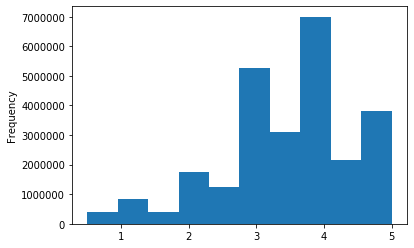

In [158]:
# checking ratings
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()

In [159]:
# new
movies_df = pd.merge(wiki_movies_df, kaggle_metadata, on='imdb_id', suffixes=['_wiki','_kaggle'])

In [160]:
movies_df.columns

Index(['url', 'year', 'imdb_link', 'title_wiki', 'Based on', 'Starring',
       'Cinematography', 'Release date', 'Country', 'Language', 'Director',
       'Distributor', 'Editor(s)', 'Composer(s)', 'Producer(s)',
       'Production company(s)', 'Writer(s)', 'imdb_id', 'box_office',
       'budget_wiki', 'release_date_wiki', 'running_time',
       'belongs_to_collection', 'budget_kaggle', 'genres', 'homepage', 'id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date_kaggle', 'revenue', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title_kaggle', 'video', 'vote_average',
       'vote_count'],
      dtype='object')

In [161]:
movies_df[['title_wiki','title_kaggle']]

,title_wiki,title_kaggle
0,The Adventures of Ford Fairlane,The Adventures of Ford Fairlane
1,"After Dark, My Sweet","After Dark, My Sweet"
2,Air America,Air America
3,Alice,Alice
4,Almost an Angel,Almost an Angel
...,...,...
6047,A Fantastic Woman,A Fantastic Woman
6048,Permission,Permission
6049,Loveless,Loveless
6050,Gemini,Gemini


In [162]:
# Look at the rows where the titles don’t match.
movies_df[movies_df['title_wiki'] != movies_df['title_kaggle']][['title_wiki','title_kaggle']]

,title_wiki,title_kaggle
27,China Cry,China Cry: A True Story
36,Daddy's Dyin' ...Who's Got the Will?,Daddy's Dyin'... Who's Got the Will?
38,The Dark Side of the Moon,The Dark Side of The Moon
42,Delta Force 2,Delta Force 2: The Colombian Connection
48,DuckTales the Movie:Treasure of the Lost Lamp,DuckTales: The Movie - Treasure of the Lost Lamp
...,...,...
5956,Chips,CHiPS
5971,Spark,Spark: A Space Tail
5994,Pirates of the Caribbean:Dead Men Tell No Tales,Pirates of the Caribbean: Dead Men Tell No Tales
6023,Valerian and the Cityof a Thousand Planets,Valerian and the City of a Thousand Planets


In [163]:
# Let’s confirm there aren’t any missing titles in the Kaggle data
